In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read each csv file into a separate DataFrame
df_1 = pd.read_csv("../documents/analysis_results1.csv")
df_2 = pd.read_csv("../documents/analysis_results2.csv")
df_3 = pd.read_csv("../documents/analysis_results3.csv")
df_4 = pd.read_csv("../documents/analysis_results4.csv")
df_5 = pd.read_csv("../documents/analysis_results5.csv")
df_6 = pd.read_csv("../documents/analysis_results6.csv")
df_7 = pd.read_csv("../documents/analysis_results7.csv")
df_8 = pd.read_csv("../documents/analysis_results8.csv")
df_9 = pd.read_csv("../documents/analysis_results9.csv")
df_10 = pd.read_csv("../documents/analysis_results10.csv")

df_1_test_code = pd.read_csv("../documents/analysis_results1_test_code.csv", sep=";")
df_2_test_code = pd.read_csv("../documents/analysis_results2_test_code.csv", sep=";")
df_3_test_code = pd.read_csv("../documents/analysis_results3_test_code.csv", sep=";")
df_4_test_code = pd.read_csv("../documents/analysis_results4_test_code.csv", sep=";")
df_5_test_code = pd.read_csv("../documents/analysis_results5_test_code.csv", sep=";")
df_6_test_code = pd.read_csv("../documents/analysis_results6_test_code.csv", sep=";")
df_7_test_code = pd.read_csv("../documents/analysis_results7_test_code.csv", sep=";")
df_8_test_code = pd.read_csv("../documents/analysis_results8_test_code.csv", sep=";")
df_9_test_code = pd.read_csv("../documents/analysis_results9_test_code.csv", sep=";")
df_10_test_code = pd.read_csv("../documents/analysis_results10_test_code.csv", sep=";")

In [3]:
# create different DataFrames
input_df = df_1[df_1["iteration"] == 0]
combined_df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10], keys=["Run1", "Run2", "Run3", "Run4", "Run5", "Run6", "Run7", "Run8", "Run9", "Run10"], names=["Run", "Index"]).reset_index(level="Run")
combined_df_test_code = pd.concat([df_1_test_code, df_2_test_code, df_3_test_code, df_4_test_code, df_5_test_code, df_6_test_code, df_7_test_code, df_8_test_code, df_9_test_code, df_10_test_code], keys=["Run1", "Run2", "Run3", "Run4", "Run5", "Run6", "Run7", "Run8", "Run9", "Run10"], names=["Run", "Index"]).reset_index(level="Run")
filenames = combined_df["filename"].unique()
accepted_only_df = combined_df[combined_df["validation_status"] == "ACCEPTED"]
accepted_only_df_test_code = combined_df_test_code[combined_df_test_code["validation_status"].astype(str).str.strip() == "ACCEPTED"]

pd.set_option("display.max_rows", None)
print(input_df.mean(numeric_only=True).round(2), "\n")
print(accepted_only_df.mean(numeric_only=True).round(2), "\n")
print(accepted_only_df_test_code.mean(numeric_only=True).round(2))

iteration                  0.00
cyclic_complexity          2.67
loc                       15.78
maintainability_index     66.57
halstead_volume           93.53
halstead_difficulty        3.58
halstead_effort          434.36
dtype: float64 

iteration                  2.23
cyclic_complexity          3.80
loc                       14.58
maintainability_index     69.05
halstead_volume           58.45
halstead_difficulty        2.41
halstead_effort          222.71
dtype: float64 

iteration                 2.46
cyclic_complexity         5.25
loc                      26.93
maintainability_index    74.18
halstead_volume          14.78
halstead_difficulty       0.85
halstead_effort          15.75
dtype: float64


In [4]:
# list of metrics
metrics = ["cyclic_complexity", "halstead_volume", "halstead_difficulty", "halstead_effort", "loc", "maintainability_index"]
metrics_with_iteration = ["iteration", "cyclic_complexity", "halstead_volume", "halstead_difficulty", "halstead_effort", "loc", "maintainability_index"]

In [5]:
# average metrics per code sample and iteration
grouped_test_code_metrics = accepted_only_df.groupby(["filename", "iteration"]).mean(numeric_only=True).reset_index()
grouped_test_code_metrics.round(2)


,filename,iteration,cyclic_complexity,loc,maintainability_index,halstead_volume,halstead_difficulty,halstead_effort
0,952227.py,0,0.00,7.00,69.15,51.89,1.88,97.30
1,952227.py,1,0.00,4.50,73.92,51.89,1.88,97.30
2,952227.py,2,0.30,4.80,73.19,48.56,1.83,89.88
3,952227.py,3,1.50,7.00,70.80,41.84,1.64,72.97
4,952227.py,4,1.60,8.10,69.47,45.89,1.81,85.82
5,952227.py,5,1.90,7.60,69.84,48.04,1.86,90.73
6,952296.py,0,0.00,20.00,71.30,182.84,6.30,1151.87
7,952296.py,1,0.00,16.00,75.09,166.91,5.00,834.54
8,952296.py,2,6.00,18.00,72.75,166.91,5.00,834.54
9,952296.py,3,6.00,12.00,81.31,166.91,5.00,834.54


In [6]:
# average metrics per code sample
for file in filenames: 
    file_df = combined_df[combined_df["filename"] == file]
    print(f"{file}:", "\n", file_df.mean(numeric_only=True).round(2))

952227.py: 
 iteration                 2.50
cyclic_complexity         0.88
loc                       6.50
maintainability_index    71.06
halstead_volume          48.02
halstead_difficulty       1.82
halstead_effort          89.00
dtype: float64
952296.py: 
 iteration                  1.00
cyclic_complexity          0.92
loc                       17.12
maintainability_index     74.84
halstead_volume          139.52
halstead_difficulty        5.44
halstead_effort          789.16
dtype: float64
954044.py: 
 iteration                 2.46
cyclic_complexity         1.64
loc                       9.53
maintainability_index    98.89
halstead_volume           0.89
halstead_difficulty       0.09
halstead_effort           0.44
dtype: float64
956270.py: 
 iteration                 2.13
cyclic_complexity         6.09
loc                      17.67
maintainability_index    65.12
halstead_volume          23.44
halstead_difficulty       1.98
halstead_effort          65.80
dtype: float64
958432.py: 
 

In [7]:
# overall average metrics per iteration 
combined_test_code_mean_metrics_overall = accepted_only_df.groupby("iteration").mean(numeric_only=True).reset_index()
combined_test_code_mean_metrics_overall.round(2)

,iteration,cyclic_complexity,loc,maintainability_index,halstead_volume,halstead_difficulty,halstead_effort
0,0,2.67,15.78,66.57,93.53,3.58,434.36
1,1,3.38,14.27,68.67,61.30,2.35,221.11
2,2,4.01,13.99,69.74,50.44,2.18,174.67
3,3,4.13,13.78,70.39,45.34,1.99,150.63
4,4,4.75,15.13,69.69,43.01,1.92,133.57
5,5,4.50,14.23,70.41,40.90,1.95,129.89


In [8]:
# overall average metrics per iteration of test_code
combined_test_code_mean_metrics_overall_test_code = accepted_only_df_test_code.groupby("iteration").mean(numeric_only=True).reset_index()
combined_test_code_mean_metrics_overall_test_code.round(2)

,iteration,cyclic_complexity,loc,maintainability_index,halstead_volume,halstead_difficulty,halstead_effort
0,0,8.00,53.00,83.48,38.04,1.14,43.47
1,1,6.00,29.33,69.89,5.95,0.56,3.84
2,2,4.80,22.10,75.14,9.66,0.70,10.13
3,3,4.50,20.20,73.04,10.13,0.75,10.37
4,4,4.22,18.22,71.01,11.92,1.04,14.37
5,5,3.78,17.11,71.53,11.48,0.93,10.48


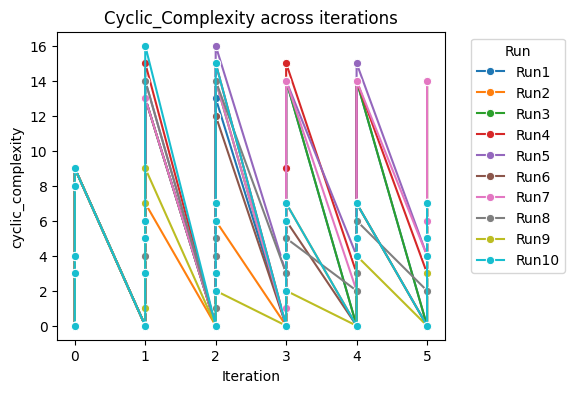

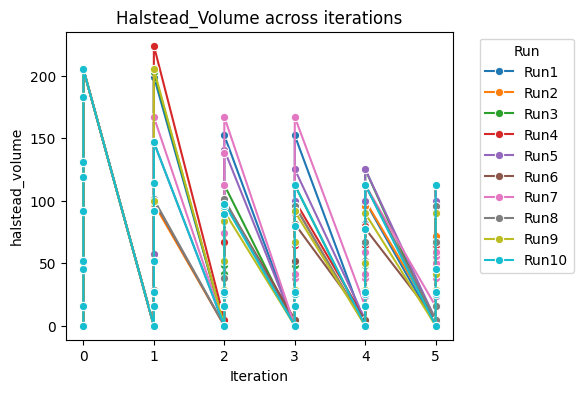

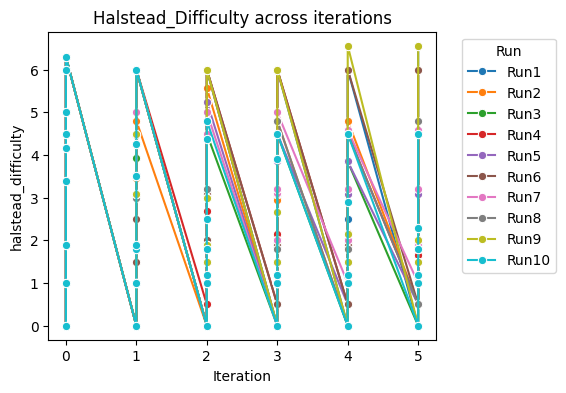

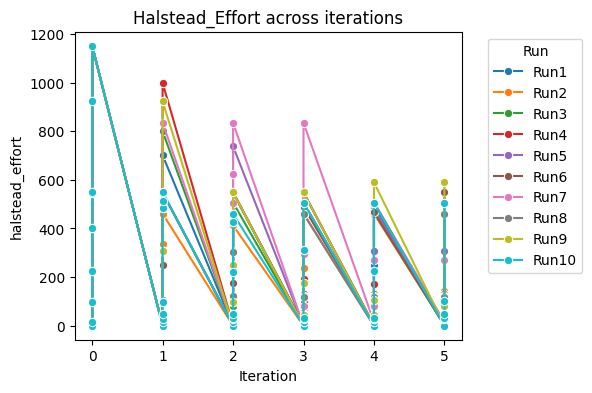

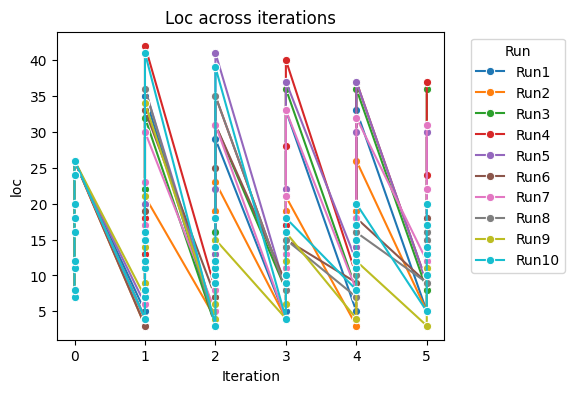

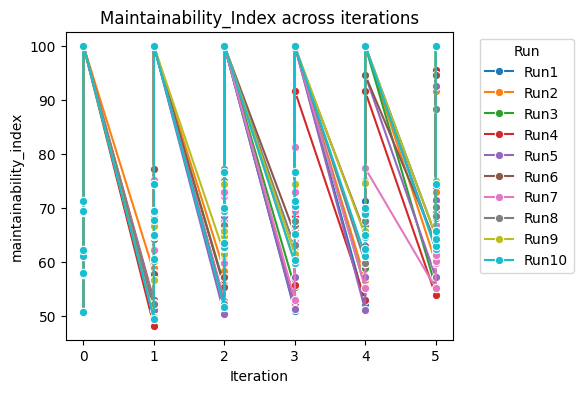

In [9]:
# plotting metrics across iterations 
def plot_metric(metric):
    plt.figure(figsize=(5, 4))
    sns.lineplot(data=accepted_only_df, x="iteration", y=metric, hue="Run", marker="o", estimator=None)
    plt.title(f"{metric.title()} across iterations")
    plt.xlabel("Iteration")
    plt.ylabel(metric)
    plt.legend(title="Run", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

for metric in metrics:
    plot_metric(metric)

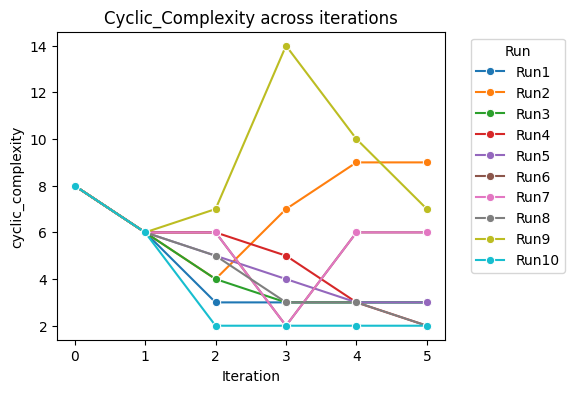

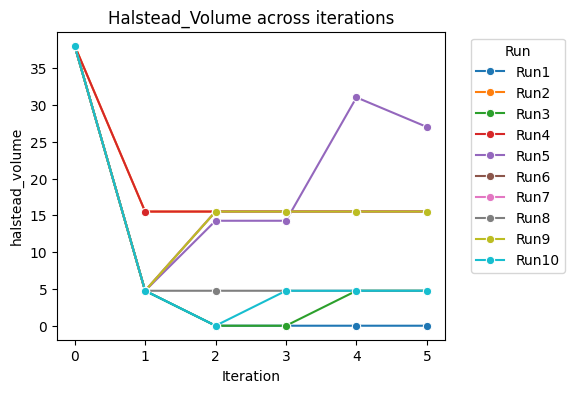

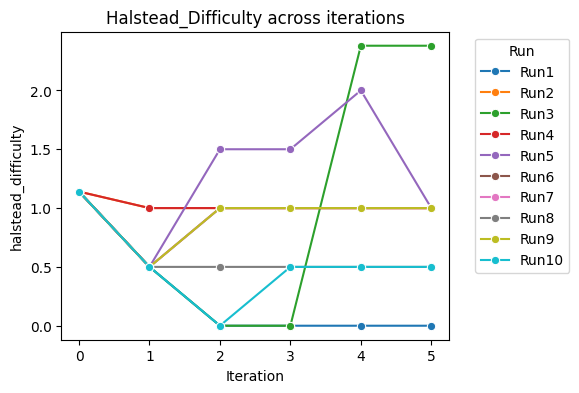

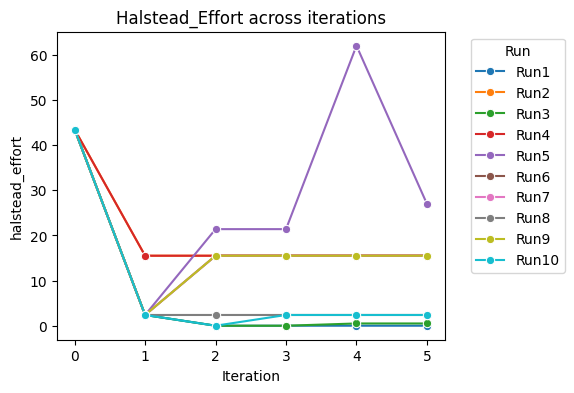

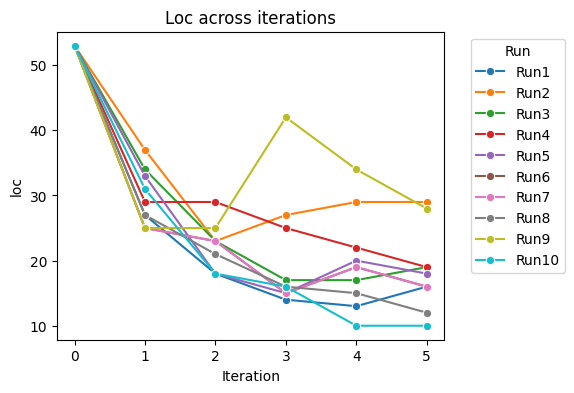

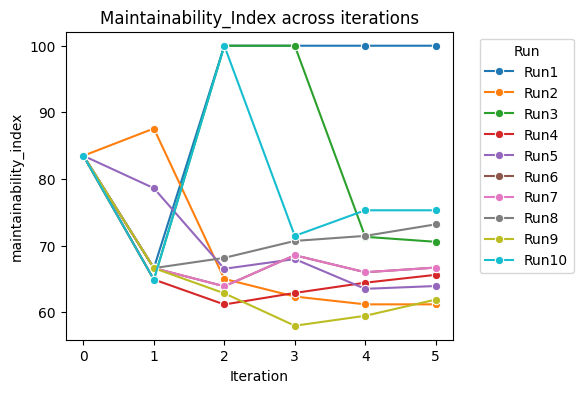

In [10]:
# plotting metrics across iterations for test_code 
def plot_metric_test_code(metric):
    plt.figure(figsize=(5, 4))
    sns.lineplot(data=combined_df_test_code, x="iteration", y=metric, hue="Run", marker="o", estimator=None)
    plt.title(f"{metric.title()} across iterations")
    plt.xlabel("Iteration")
    plt.ylabel(metric)
    plt.legend(title="Run", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

for metric in metrics:
    plot_metric_test_code(metric)

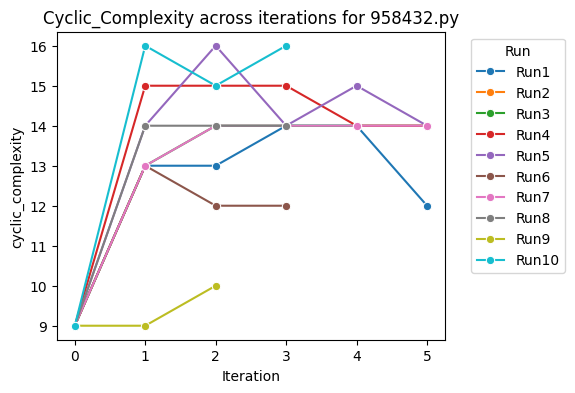

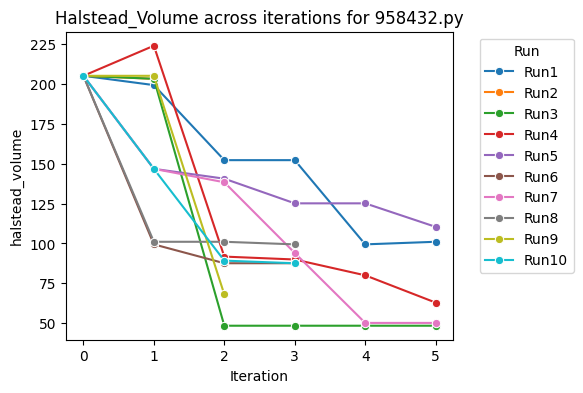

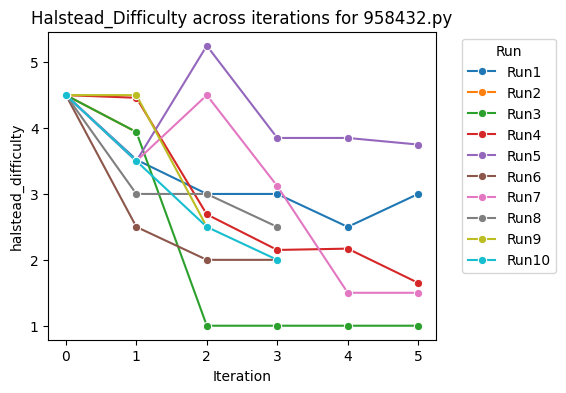

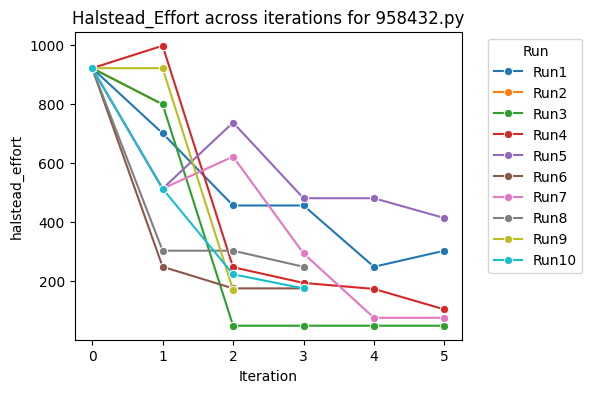

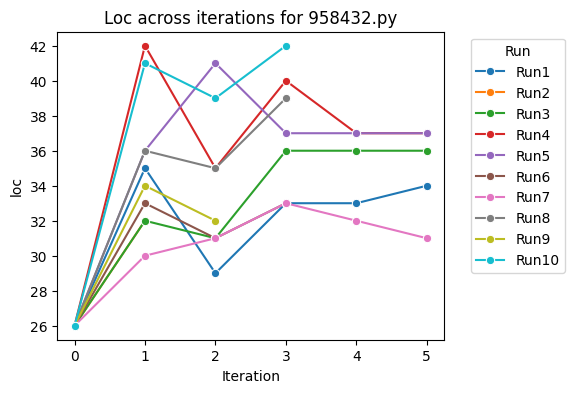

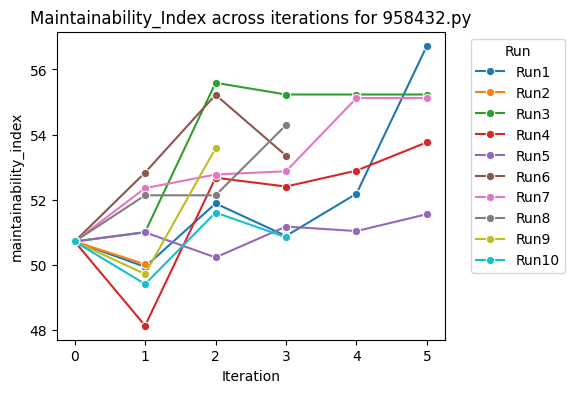

In [11]:
# plotting metrics across iterations for given  filename
def plot_metric_by_filename(metric, filename):
    plt.figure(figsize=(5, 4))
    sns.lineplot(data=combined_df[combined_df["filename"] == filename], x="iteration", y=metric, hue="Run", marker="o", estimator=None)
    plt.title(f"{metric.title()} across iterations for {filename}")
    plt.xlabel("Iteration")
    plt.ylabel(metric)
    plt.legend(title="Run", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

for metric in metrics:
    plot_metric_by_filename(metric, filenames[4])

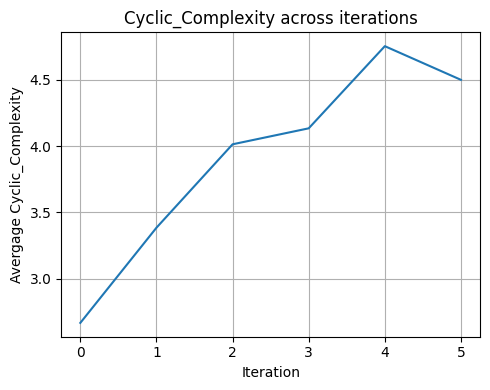

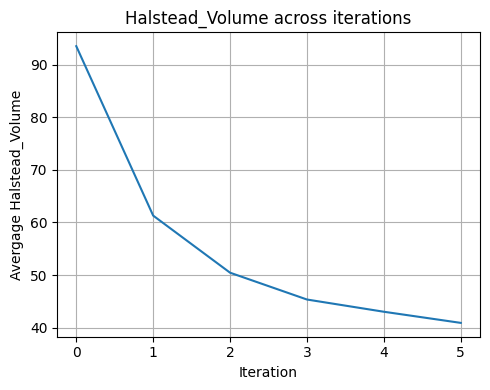

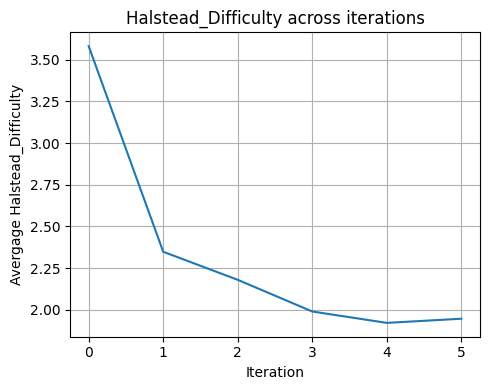

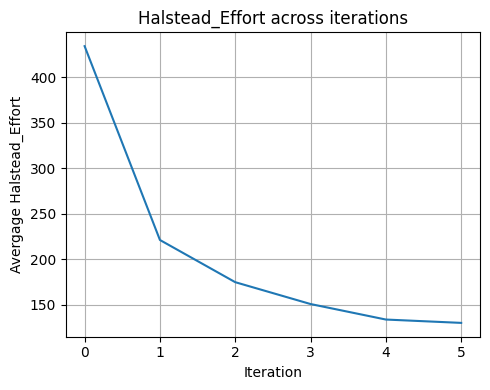

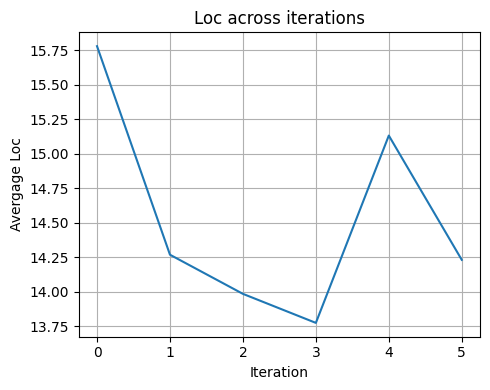

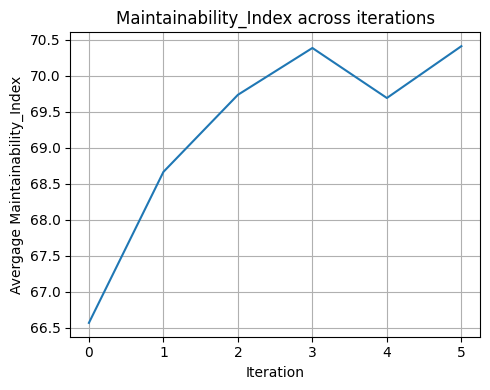

In [12]:
# plotting average metrics across iterations 
def plot_average_metrics(metric):
    plt.figure(figsize=(5, 4))
    plt.plot(combined_test_code_mean_metrics_overall["iteration"], combined_test_code_mean_metrics_overall[metric], marker="", linestyle="-")
    plt.title(f"{metric.title()} across iterations")
    plt.xlabel("Iteration")
    plt.ylabel(f"Avergage {metric.title()}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

for metric in metrics:
    plot_average_metrics(metric)

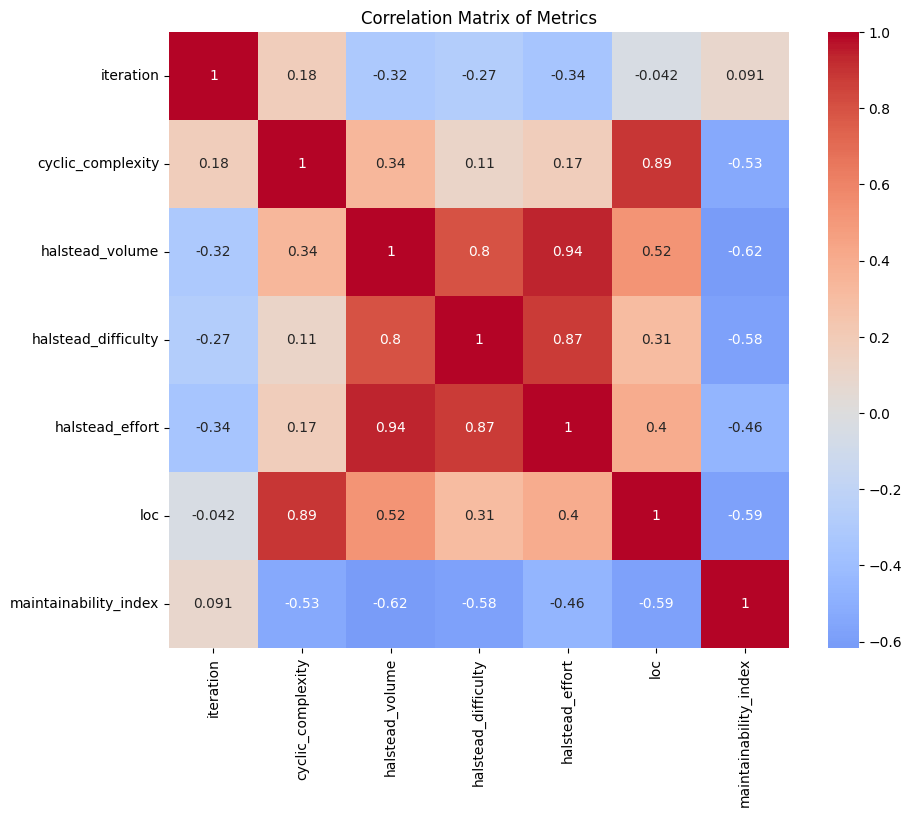

In [13]:
# plotting the correlation matrix with iteration
correlation_matrix = accepted_only_df[metrics_with_iteration].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of Metrics")
plt.show()

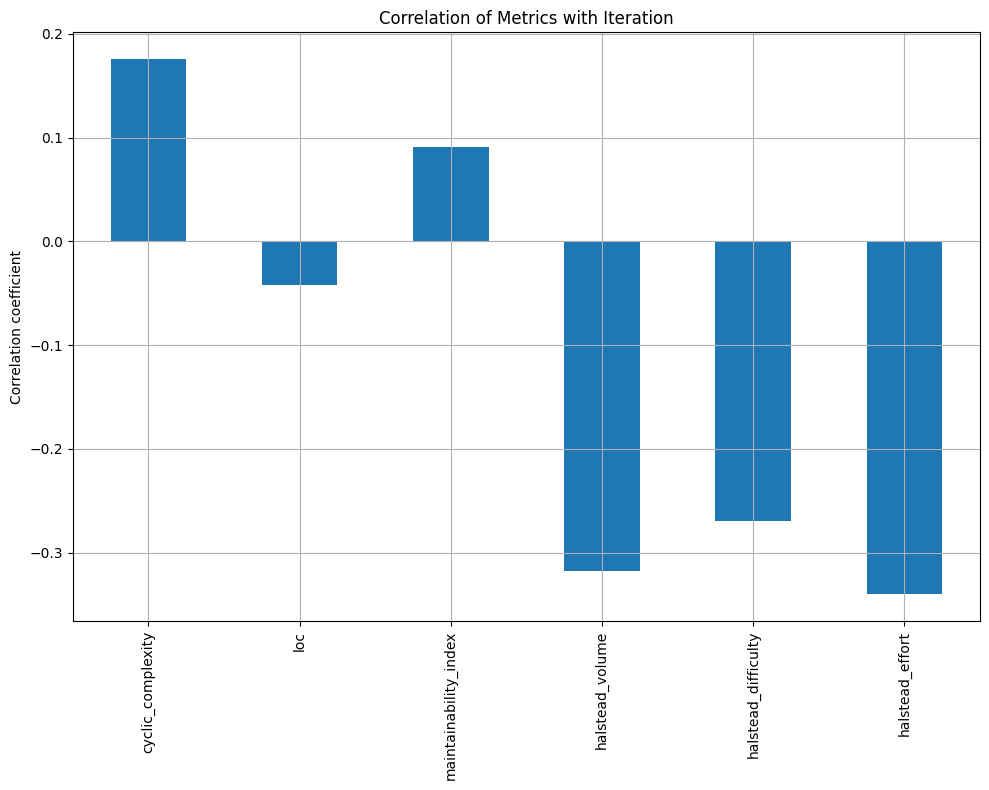

In [14]:
# plotting the correlation matrix with iteration
correlation_with_iteration = accepted_only_df.corr(numeric_only=True)["iteration"]
plt.figure(figsize=(10, 8))
correlation_with_iteration.drop("iteration").plot(kind="bar")
plt.title("Correlation of Metrics with Iteration")
plt.ylabel("Correlation coefficient")
plt.grid(True)
plt.tight_layout()

plt.show()